In [ ]:
import cv2, matplotlib
import numpy as np
import matplotlib.pyplot as plt

#read an image
img = cv2.imread('seki.jpg') 
#show image format (basically a 3-d array of pixel color info, in BGR format)
print(img)
#convert image to RGB color for matplotlib
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
 
# show image with matplotlib
plt.imshow(img)

# convert image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
 
# grayscale image represented as a 2-d array
print(gray_img)


# find average per row, assuming image is already in the RGB format.
# np.average() takes in an axis argument which finds the average across that axis.
average_color_per_row = np.average(img, axis=0)

# find average across average per row
average_color = np.average(average_color_per_row, axis=0)

# convert back to uint8
average_color = np.uint8(average_color)
print(average_color)



# create 100 x 100 pixel image with average color value
average_color_img = np.array([[average_color]*100]*100, np.uint8)
 
plt.imshow(average_color_img)


# threshold for image, with threshold 60
_, threshold_img = cv2.threshold(gray_img, 60, 255, cv2.THRESH_BINARY)
 
# show image
threshold_img = cv2.cvtColor(threshold_img, cv2.COLOR_GRAY2RGB)
plt.imshow(threshold_img)


# open new Mondrian Piet painting photo
piet = cv2.imread('seki.jpg')
piet_hsv = cv2.cvtColor(piet, cv2.COLOR_BGR2HSV)
 
# threshold for hue channel in blue range
blue_min = np.array([50, 50, 50], np.uint8)
blue_max = np.array([500, 500, 500], np.uint8)
threshold_blue_img = cv2.inRange(piet_hsv, blue_min, blue_max)
 
threshold_blue_img = cv2.cvtColor(threshold_blue_img, cv2.COLOR_GRAY2RGB)
 
plt.imshow(threshold_blue_img)



upstate = cv2.imread('seki.jpg')
upstate_hsv = cv2.cvtColor(upstate, cv2.COLOR_BGR2HSV)
plt.imshow(cv2.cvtColor(upstate_hsv, cv2.COLOR_HSV2RGB))
plt.show()
 
# get mask of pixels that are in blue range
mask_inverse = cv2.inRange(upstate_hsv, blue_min, blue_max)
 
# inverse mask to get parts that are not blue
mask = cv2.bitwise_not(mask_inverse)
plt.imshow(cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB))
 
# convert single channel mask back into 3 channels
mask_rgb = cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB)
 
# perform bitwise and on mask to obtain cut-out image that is not blue
masked_upstate = cv2.bitwise_and(upstate, mask_rgb)
 
# replace the cut-out parts with white
masked_replace_white = cv2.addWeighted(masked_upstate, 1, \
                                       cv2.cvtColor(mask_inverse, cv2.COLOR_GRAY2RGB), 1, 0)
 
plt.imshow(cv2.cvtColor(masked_replace_white, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
import cv2, matplotlib
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('seki.jpg')
 
# gaussian blurring with a 5x5 kernel
img_blur_small = cv2.GaussianBlur(img, (19,15),0, 50)
plt.imshow(img_blur_small)
plt.show()

In [ ]:
import cv2, matplotlib
import numpy as np
import matplotlib.pyplot as plt

# get binary image and apply Gaussian blur
im = cv2.imread('seki.jpg')
imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
face_preprocessed = cv2.GaussianBlur(imgray, (5, 5), 0)

# get binary image
ret, thresh = cv2.threshold(face_preprocessed, 127, 255, cv2.THRESH_BINARY)


# invert image to get coins
face_binary = cv2.bitwise_not(thresh)

image, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)



# make copy of image
face_and_contours = np.copy(im)

 
    
# find contours of large enough area
min_face_area =100000
large_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > min_face_area]

 
    
# draw contours
cv2.drawContours(face_and_contours, large_contours, -1, (255,0,0))

 
    
# print number of contours
print('number of coins: %d' % len(large_contours))


# create copy of image to draw bounding boxes
bounding_img = np.copy(im)
 
# for each contour find bounding box and draw rectangle
for contour in large_contours:
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(bounding_img, (x, y), (x + w, y + h), (0, 255, 0), 3)

In [ ]:
import cv2, matplotlib
import numpy as np
import matplotlib.pyplot as plt

cups = cv2.imread('seki.jpg')
 
# preprocess by blurring and grayscale
cups_preprocessed  = cv2.cvtColor(cv2.GaussianBlur(cups, (7,7), 0), cv2.COLOR_BGR2GRAY)
 
# find binary image with thresholding
_, cups_thresh = cv2.threshold(cups_preprocessed, 80, 255, cv2.THRESH_BINARY)
plt.imshow(cv2.cvtColor(cups_thresh, cv2.COLOR_GRAY2RGB))



# find binary image with edges
cups_edges = cv2.Canny(cups_preprocessed, threshold1=20, threshold2=50)
plt.imshow(cv2.cvtColor(cups_edges, cv2.COLOR_GRAY2RGB))
cv2.imwrite('face-edges.jpg', cups_edges)



# copy of image to draw lines
cups_lines = np.copy(cups)
 
# find hough lines
num_pix_threshold = 110 # minimum number of pixels that must be on a line
lines = cv2.HoughLines(cups_edges, 1, np.pi/180, num_pix_threshold)
 
for rho, theta in lines[0]:
    # convert line equation into start and end points of line
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
 
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
 
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
 
    cv2.line(cups_lines, (x1,y1), (x2,y2), (0,0,255), 1)
    

In [ ]:
import cv2, matplotlib
import numpy as np
import matplotlib.pyplot as plt

# find hough circles
circles = cv2.HoughCircles(cups_edges, cv2.cv.CV_HOUGH_GRADIENT, dp=1.5, minDist=50, minRadius=20, maxRadius=130)
cups_circles = np.copy(cups)
 
# if circles are detected, draw them
if circles is not None and len(circles) > 0:
    # note: cv2.HoughCircles returns circles nested in an array.
    # the OpenCV documentation does not explain this return value format
    circles = circles[0]
    for (x, y, r) in circles:
        x, y, r = int(x), int(y), int(r)
        cv2.circle(cups_circles, (x, y), r, (255, 255, 0), 4)
    plt.imshow(cv2.cvtColor(cups_circles, cv2.COLOR_BGR2RGB))
 
print('number of circles detected: %d' % len(circles[0]))
number of circles detected: 3

ここからは画像クローラーのプログラム

In [ ]:
# -*- coding: utf-8 -*-

from bs4 import BeautifulSoup
import requests
import re
#import urllib2
import urllib
import urllib.request
import urllib.parse
import os
import cookielib
import json
import http
import http.cookiejar

def get_soup(url,header):
    return BeautifulSoup(urllib.urlopen(urllib.Request(url,headers=header)),'html.parser')

query = "Soccer"# サッカーの画像を検索
label="0"
print query
query= query.split()
query='+'.join(query)
url="https://www.google.co.in/search?q="+query+"&source=lnms&tbm=isch"
print url
#add the directory for your image here
DIR="Pictures"
header={'User-Agent':"Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/43.0.2357.134 Safari/537.36"
}
soup = get_soup(url,header)


ActualImages=[]# contains the link for Large original images, type of  image
for a in soup.find_all("div",{"class":"rg_meta"}):
    link , Type =json.loads(a.text)["ou"]  ,json.loads(a.text)["ity"]
    ActualImages.append((link,Type))

print  "there are total" , len(ActualImages),"images"

if not os.path.exists(DIR):
            os.mkdir(DIR)
DIR = os.path.join(DIR, query.split()[0])

if not os.path.exists(DIR):
            os.mkdir(DIR)
###print images
for i , (img , Type) in enumerate( ActualImages):
    try:
        req = urllib2.Request(img, headers={'User-Agent' : header})
        raw_img = urllib2.urlopen(req).read()

        cntr = len([i for i in os.listdir(DIR) if label in i]) + 1
        print cntr
        if len(Type)==0:
            f = open(os.path.join(DIR , label + "_"+ str(cntr)+".jpg"), 'wb')
        else :
            f = open(os.path.join(DIR , label + "_"+ str(cntr)+"."+Type), 'wb')


        f.write(raw_img)
        f.close()
    except Exception as e:
        print "could not load : "+img
        print e

Github pythonでFlickerAPIを使って画像URLを取得する。

In [ ]:
#coding: utf-8
from poster.encode import multipart_encode
from poster.streaminghttp import register_openers
import json
import sys
import urllib
import urllib.request
import urllib.parse


def getImageUrlFromFlickr(API_KEY, query, N):

    NUM_OF_PHOTO = str(N) #取得する画像URLの数
    option = '&sort=relevance&privacy_filter=1&content_type=1&per_page='+ NUM_OF_PHOTO +'&format=json&nojsoncallback=1'
    url = 'https://api.flickr.com/services/rest/?method=flickr.photos.search&api_key='+ API_KEY + option

    #JSON形式で結果を取得
    register_openers()
    datagen, headers = multipart_encode({'text': query})
    request = urllib.request(url,datagen, headers)#
    response = urllib.request.urlopen(request)#
    res_dat = response.read()
    

    url_list = [] #URLリスト
    template_url = 'https://farm%s.staticflickr.com/%s/%s_%s.jpg' #URLのテンプレート
    for i in json.loads(res_dat)['photos']['photo']:
        img_url = template_url % (i['farm'],i['server'],i['id'],i['secret'])
        url_list.append(img_url) #リストに画像URLを追加

    return url_list

if __name__ == '__main__':

    API_KEY = '25b04bcb3cad7ed64fd7f278676dea3a'

    query = sys.argv[1]
    #API KEY, クエリ, 取得した画像数を渡す
    url_list = getImageUrlFromFlickr(API_KEY, query, 10)
    print(response)#
    #取得した画像URLを表示
    for url in url_list:
        print (url)

pythonによるクローラーとスクレイピング

In [ ]:
import os
from urllib.parse import urlencode

import scrapy


class FlickrSpider(scrapy.Spider):
    name = "flickr"
    # Files Pipelineでダウンロードされる画像ファイルはallowed_domainsに
    # 制限されないので、allowed_domainsに'staticflickr.com'を追加する必要はない。
    allowed_domains = ["api.flickr.com"]

    # キーワード引数でSpider引数の値を受け取る。
    def __init__(self, text='people'):
        super().__init__()  # 親クラスの__init__()を実行。

        # 環境変数とSpider引数の値を使ってstart_urlsを組み立てる。
        # urlencode()関数は、引数に指定したdictのキーと値をURLエンコードして
        # key1=value1&key2=value2 という形式の文字列を返す。
        self.start_urls = [
            'https://api.flickr.com/services/rest/?' + urlencode({
                'method': 'flickr.photos.search',
                'api_key':['25b04bcb3cad7ed64fd7f278676dea3a'],  # FlickrのAPIキーは環境変数から取得。os.envirn
                'text': text,
                'sort': 'relevance',
                'license': '4,5,9',  # CC BY 2.0, CC BY-SA 2.0, CC0を指定。
            }),
        ]

    def parse(self, response):
        """
        APIのレスポンスをパースしてfile_urlsというキーを含むdictをyieldする。
        """

        for photo in response.css('photo'):
            yield {'file_urls': [flickr_photo_url(photo)]}


def flickr_photo_url(photo):
    """
    Flickrの写真のURLを組み立てる。
    参考: https://www.flickr.com/services/api/misc.urls.html
    """

    # ここではXPathのほうがCSSセレクターよりも簡潔になるので、XPathを使っている。
    return 'https://farm{farm}.staticflickr.com/{server}/{id}_{secret}_{size}.jpg'.format(
        farm=photo.xpath('@farm').extract_first(),
        server=photo.xpath('@server').extract_first(),
        id=photo.xpath('@id').extract_first(),
        secret=photo.xpath('@secret').extract_first(),
        size='b',
    )

if __name__ == '__main__':
    url_list = flickr_photo_url(photo)
    #取得した画像URLを表示
    for url in url_list:
        print (url)

画像取得にはhttp://farm{farm-id}.staticflickr.com/{server-id}/{id}_{secret}.jpg

In [ ]:
import json
import requests

url = 'https://api.flickr.com/services/rest/'
API_KEY = '25b04bcb3cad7ed64fd7f278676dea3a'
SECRET_KEY = 'e970d4a9b95367d5'
page=10
serchword='sky'

query = {
        'method': 'flickr.photos.search',
        'api_key': API_KEY,
        'text': serchword,  #検索ワード
        'per_page': page,  #1ページ辺りのデータ数
        'format': 'json',
        'nojsoncallback': '1'
        }

r = requests.get(url, params=query)
writer=json.dumps(r.json(), sort_keys=True, indent=2)
f = open('flickr.json', 'w') 
f.writelines(writer) 
f.close()

f=open("flickr.json", "r",encoding="utf-8-sig")
js=json.loads(f.read())
f.close()

#https://farm{farm}.staticflickr.com/{server}/{id}_{secret}_{size}.jpg'
s="URL: \n"
for z in js["photos"]["photo"]:
    s +="https://farm"+str(z["farm"]) + ".staticflickr.com/" + z["server"] + "/" + z["id"] + "_" + z["secret"] + "_b.jpg"+","+ "\n"
print(s)
#print (r)
#print (json.dumps(r.json(), sort_keys=True, indent=2))


Photo Source URLs

You can construct the source URL to a photo once you know its ID, server ID, farm ID and secret, as returned by many API methods.

The URL takes the following format:

https://farm{farm-id}.staticflickr.com/{server-id}/{id}_{secret}.jpg
	or
https://farm{farm-id}.staticflickr.com/{server-id}/{id}_{secret}_[mstzb].jpg
	or
https://farm{farm-id}.staticflickr.com/{server-id}/{id}_{o-secret}_o.(jpg|gif|png)
* Before November 18th, 2011 the API returned image URLs with hostnames like: "farm{farm-id}.static.flickr.com". Those URLs are still supported.

Size Suffixes

The letter suffixes are as follows:

s	small square 75x75
q	large square 150x150
t	thumbnail, 100 on longest side
m	small, 240 on longest side
n	small, 320 on longest side
-	medium, 500 on longest side
z	medium 640, 640 on longest side
c	medium 800, 800 on longest side†
b	large, 1024 on longest side*
h	large 1600, 1600 on longest side†
k	large 2048, 2048 on longest side†
o	original image, either a jpg, gif or png, depending on source format
* Before May 25th 2010 large photos only exist for very large original images.

† Medium 800, large 1600, and large 2048 photos only exist after March 1st 2012.

Note: Original photos behave a little differently. They have their own secret (called originalsecret in responses) and a variable file extension (called originalformat in responses). These values are returned via the API only when the caller has permission to view the original size (based on a user preference and various other criteria). The values are returned by the flickr.photos.getInfo method and by any method that returns a list of photos and allows an extras parameter (with a value of original_format), such as flickr.photos.search. The flickr.photos.getSizes method, as always, will return the full original URL where permissions allow.

Example

https://farm1.staticflickr.com/2/1418878_1e92283336_m.jpg

farm-id: 1
server-id: 2
photo-id: 1418878
secret: 1e92283336
size: m
Web Page URLs

URLs to photo and profile pages use either the user's NSID (the number with the '@' sign in it) or their custom URL (if they've chosen one). You can find their custom URL with a call to flickr.people.getInfo. The NSID version of the URL will always work, regardless of whether they've set up a 'pretty' URL, so you can avoid the API call by simply using the the user ID returned by most photo API calls.

You can then easily build URLs to profiles, photostreams, individual photos or photosets:

https://www.flickr.com/people/{user-id}/ - profile
https://www.flickr.com/photos/{user-id}/ - photostream
https://www.flickr.com/photos/{user-id}/{photo-id} - individual photo
https://www.flickr.com/photos/{user-id}/sets/ - all photosets
https://www.flickr.com/photos/{user-id}/sets/{photoset-id} - single photoset
Other URLs can be constructed similarly. Directing a user to https://www.flickr.com/photos/me/* or https://www.flickr.com/people/me/* will replace the 'me' with their own user ID, if they're logged in (otherwise it will redirect to the latest photos page).

Examples

https://www.flickr.com/photos/12037949754@N01/
https://www.flickr.com/photos/12037949754@N01/155761353/
https://www.flickr.com/photos/12037949754@N01/sets/
https://www.flickr.com/photos/12037949754@N01/sets/72157594162136485/
Short URLs

Flickr provides a URL shortening service for uploaded photos (and videos). Short URLs can be useful in a variety of contexts including: email, on business cards, IM, text messages, or short status updates.

Every photo on Flickr has a mathematically calculated short URL of the form:

https://flic.kr/p/{base58-photo-id}
Base58 is used to compress the photo-ids using a mix of letters and numbers. You can find more info on base58, and code samples in the Flickr API Group.

Opencvのバージョンの確認

In [ ]:
import cv2
print(cv2.__version__)

In [ ]:
import sys
import os

import cv2

try:
    cascade_path = sys.argv[1]  # 顔検出用の特徴量ファイルのパス。
except IndexError:
    # コマンドライン引数が足りない場合は使い方を表示して終了する。
    print('Usage: python extract_faces.py CASCADE_PATH IMAGE_PATH...', file=sys.stderr)
    exit(1)

# 顔画像の出力先のディレクトリが存在しない場合は作成しておく。
output_dir = 'faces'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# 特徴量ファイルが存在することを確認する。
assert os.path.exists(cascade_path)
# 特徴量ファイルのパスを指定して、分類器オブジェクトを作成する。
classifier = cv2.CascadeClassifier(cascade_path)

# 第2引数以降のファイルパスについて反復処理する。
for image_path in sys.argv[2:]:
    print('Processing', image_path, file=sys.stderr)

    # コマンドライン引数で与えたパスの画像ファイルを読み込む。
    image = cv2.imread(image_path)
    # 顔検出を高速化するため、画像をグレースケールに変換する。
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # 顔を検出する。
    faces = classifier.detectMultiScale(gray_image)

    # 画像ファイル名の拡張子を除いた部分を取得する。
    image_name = os.path.splitext(os.path.basename(image_path))[0]

    # 取得できた顔のリストについて反復処理する。
    # iは0からの連番を表す。
    for i, (x, y, w, h) in enumerate(faces):
        # 顔の部分だけを切り取った画像を取得する。
        face_image = image[y:y + h, x: x + w]
        # 出力先のファイルパスを組み立てる。
        output_path = os.path.join(output_dir, '{0}_{1}.jpg'.format(image_name, i))
        # 顔の画像を保存する。
        cv2.imwrite(output_path, face_image)


mysqlとmongodb 使い方

In [ ]:
import pymysql.cursors
connection=pymysql.connect(host="localhost",
                          user='root',
                          password='',
                          db='1113mysql',
                          charset='utf8',
                          #cursorclassを指定することでselectの結果をdictionaryで受け取れる。
                          cursorclass=pymysql.cursors.DictCursor)


try:
    with connection.cursor() as cursor:
        sql = "SELECT * FROM post"
        cursor.execute(sql)
 
        dbdata = cursor.fetchall()
        for rows in dbdata:
            print(rows)
 
finally:
    connection.close()

In [ ]:
import pymongo as pm

client = pm.MongoClient("localhost",27017)

# データベースを作成 (名前: my_database)
db = client.my_database

# コレクションを作成 (名前: my_collection)
co = db.my_collection

# 適当に保存
co.insert_one({"test": 3})

# 全部とってくる
for data in co.find():
    print (data)

database と　flckrを融合してみる。farm  server id  secret size

In [ ]:
import json
import requests
import pymysql.cursors


connection=pymysql.connect(host="localhost",
                          user='root',
                          password='',
                          db='1113mysql',
                          charset='utf8',
                          #cursorclassを指定することでselectの結果をdictionaryで受け取れる。
                          cursorclass=pymysql.cursors.DictCursor)



url = 'https://api.flickr.com/services/rest/'
API_KEY = '25b04bcb3cad7ed64fd7f278676dea3a'
SECRET_KEY = 'e970d4a9b95367d5'


query = {
        'method': 'flickr.photos.search',
        'api_key': API_KEY,
        'text': 'sushi',  #検索ワード
        'per_page': '5',  #1ページ辺りのデータ数
        'format': 'json',
        'nojsoncallback': '1'
        }

r = requests.get(url, params=query)

writer=json.dumps(r.json(), sort_keys=True, indent=2)
f = open('flickr.json', 'w') 
f.writelines(writer) 
f.close()

f=open("flickr.json", "r",encoding="utf-8-sig")
js=json.loads(f.read())
f.close()

#https://farm{farm}.staticflickr.com/{server}/{id}_{secret}_{size}.jpg'
s="URL: \n"
for z in js["photos"]["photo"]:
    s +="https://farm"+str(z["farm"]) + ".staticflickr.com/" + z["server"] + "/" + z["id"] + "_" + z["secret"] + "_b.jpg"+","+ "\n"
print(s)


#カーソルの取得
cur = connection.cursor()
#テーブルの作成
cur.execute('DROP TABLE items')#''

cur.execute(      #''''''
    CREATE TABLE items(
        item_id INTEGER PRIMARY KEY AUTO_INCREMENT,
        farm INTEGER,
        server INTEGER,
        id INTEGER,
        secret INTEGER,
        size  INTEGER,
        )
        )

connection.commit()

f=open("flickr.json", "r",encoding="utf-8-sig")
js=json.loads(f.read())
f.close()

#データの挿入
data=[('id'),('URL')]
for i in data:
    cur.execute(INSERT INTO items(farm,server,id,secret,size) VALUES(%s,%s),i) #"
    
connection.commit()
    
#データの抽出
cur.execute(SELECT * FROM items) #
for row in cur.fetchall():
    print(row)

connection.commit()

connection.close()

In [ ]:
import json
import requests
import pymysql.cursors
import MySQLdb



conn=MySQLdb.connect(host="localhost",
                          user='root',
                          password='',
                          db='network',
                          charset='utf8',
                    )


url = 'https://api.flickr.com/services/rest/'
API_KEY = '25b04bcb3cad7ed64fd7f278676dea3a'
SECRET_KEY = 'e970d4a9b95367d5'
page=5
serchword='sky'

query = {
        'method': 'flickr.photos.search',
        'api_key': API_KEY,
        'text': serchword,  #検索ワード
        'per_page': page,  #1ページ辺りのデータ数
        'format': 'json',
        'nojsoncallback': '1'
        }

r = requests.get(url, params=query)
#ファイルへの書きこみ
writer=json.dumps(r.json(), sort_keys=True, indent=2)
f = open('flickr.json', 'w') 
f.writelines(writer) 
f.close()
#ファイルの出力
f=open("flickr.json", "r",encoding="utf-8-sig")
js=json.loads(f.read())
f.close()

#https://farm{farm}.staticflickr.com/{server}/{id}_{secret}_{size}.jpg'

s="URL: \n"
for z in js["photos"]["photo"]:
    s +="https://farm"+str(z["farm"]) + ".staticflickr.com/" + z["server"] + "/" + z["id"] + "_" + z["secret"] + "_b.jpg"+ "\n"


urllist=(s.split('\n'))
urllist.pop(0)
print(urllist)

#カーソルの取得
cur = conn.cursor()
#データベースを作る
#cur.execute('DROP DATABASE IF EXISTS flickr')
#cur.execute('CREATE DATABASE flickr')
#データベースを変える
cur.execute('USE flickr')
#テーブルの作成
#execute()でSQL文を実行する
#cur.execute('DROP TABLE IF EXISTS items')
# cur.execute('''
#         CREATE TABLE items(
#         id integer,
#         URL text
#     )     
# ''')
conn.commit()
#データの挿入
#cur.execute('INSERT INTO items VALUES(%s,%s)', (1,'URL'))    

cur.executemany('INSERT INTO items VAlUES (%(id)s, %(URL)s)',[
                {'id':1,'URL':str(urllist[0])},
                {'id':2,'URL':str(urllist[1])},
                {'id':3,'URL':str(urllist[2])},
                {'id':4,'URL':str(urllist[3])},
                {'id':5,'URL':str(urllist[4])},
                ])
#commitで保存
conn.commit()


#データの抽出
cur.execute('SELECT * FROM items')
for row in cur.fetchall():
    print(row)

conn.close()

Opencv練習

In [ ]:
import cv2
img= cv2.imread('seki.jpg')
print(img.shape) #画像データ

In [ ]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) #cvtColorでグレイスケールへ
print(gray.shape)

matpolotlib,sckit-leranはRGB画像で保持するのに対して、nnOpeCVはBGR画像がデフォルト(カラー変換が必要)

In [23]:
import cv2
img= cv2.imread('grandmather.jpg')
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) #cvtColorでグレイスケールへ
# cv2.imshow('color image',img)
# cv2.waitKey(0)
# cv2.imshow('gray image',img)
# cv2.waitKey(0)

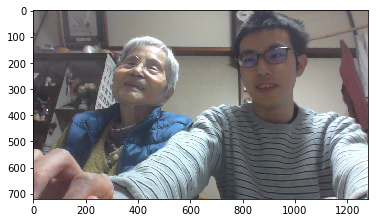

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(img) #これではBGRで画像が表示される

cvimg=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(cvimg) #これでRGB画像になる。。。opencvの中での処理にRGBにいちいち変える必要はない

画像をぼけさせる　ガウシアンブラー

In [25]:
import numpy as np
#２Dカーネルを自分で作成して　フィルタリング
kernel=np.ones((5,5),np.float32)/25
dst=cv2.filter2D(cvimg,-1,kernel)
#既に用意されているGaussianBlur関数でフィルタリング
dst2=cv2.GaussianBlur(cvimg,(5,5),0)

plt.figure(figsize=(16,8)
plt.subplot(131),plt.imshow(cvimg),plt.title('Original')
plt.xticks([]),plt.yticks([])
plt.subplot(132),plt.imshow(cvimg),plt.title('Averaging')
plt.xticks([]),plt.yticks([])
plt.subplot(133),plt.imshow(cvimg),plt.title('Averaging2')
plt.xticks([]),plt.yticks([])
plt.show()

SyntaxError: invalid syntax (<ipython-input-25-3de2ee63c0ab>, line 9)

エッジ検出
1:Laplacian (2次微分)
2:Sobel     (xに１次微分)
3:Sobel     (yに１次微分)

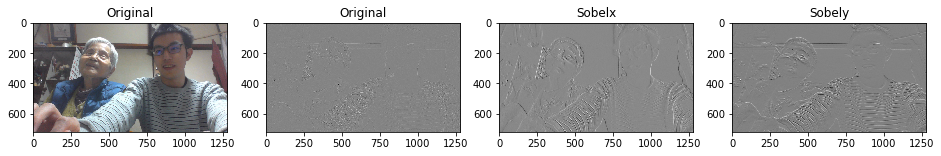

In [26]:
import cv2
laplacian =cv2.Laplacian(gray,cv2.CV_64F)
sobelx=cv2.Sobel(gray,cv2.CV_64F,1,0,ksize=5)
sobely=cv2.Sobel(gray,cv2.CV_64F,0,1,ksize=5)
plt.figure(figsize=(16,8))
plt.subplot(1,4,1),plt.imshow(cvimg,cmap='gray');plt.title('Original')
plt.subplot(1,4,2),plt.imshow(laplacian,cmap='gray');plt.title('Original')
plt.subplot(1,4,3),plt.imshow(sobelx,cmap='gray');plt.title('Sobelx')
plt.subplot(1,4,4),plt.imshow(sobely,cmap='gray');plt.title('Sobely')
plt.show()

In [29]:
import cv2

# Haar-like特徴分類器の読み込み
face_cascade = cv2.CascadeClassifier('C:\opencv-master\data\haarcascades\haarcascade_frontalface_default.xml') 
eye_cascade = cv2.CascadeClassifier('C:\opencv-master\data\haarcascades\haarcascade_smile.xml')

faces = face_cascade.detectMultiScale(gray)
for (x,y,w,h) in faces:
    # 検知した顔を矩形で囲む
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    # 顔画像（グレースケール）
    roi_gray = gray[y:y+h, x:x+w]
    # 顔ｇ増（カラースケール）
    roi_color = img[y:y+h, x:x+w]
    # 顔の中から目を検知
    eyes = eye_cascade.detectMultiScale(roi_gray)
    smilecounter=0
    for (ex,ey,ew,eh) in eyes:
         # 検知した目を矩形で囲む
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        smilecounter +=1
    print('笑顔度数:' + str(smilecounter))
#画像のサイズ取得
height = img.shape[0]
width = img.shape[1]

#画像のアスペクト比を維持したまま表示
#cv2.namedWindow("image", cv2.WINDOW_KEEPRATIO | cv2.WINDOW_NORMAL)

#画像のサイズをWINDOW_NORMALでユーザーが変更できるようにする.
cv2.namedWindow("image",cv2.WINDOW_NORMAL)

#画像表示        
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

笑顔度数:4
笑顔度数:7
笑顔度数:0
